In [1]:
pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=fa1348e1bf621f2d345c86cb5612ea0cc444b8489e5d3985d40ff2f40795b948
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


# Data Statistics

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [3]:
initial_data = yf.download("ETH-EUR", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,1172.095947,1301.153564,1171.469727,1298.652588,1298.652588,19946414926
2021-03-02,1298.117920,1326.037109,1208.967773,1235.105469,1235.105469,18637908745
2021-03-03,1234.147583,1367.737915,1226.239990,1308.147217,1308.147217,18822788938
2021-03-04,1307.126709,1345.680298,1262.395508,1288.449829,1288.449829,19140742204
2021-03-05,1288.138428,1298.980957,1216.306885,1287.248779,1287.248779,17686754673


In [5]:
initial_data['Adj Close'].head()

Date
2021-03-01    1298.652588
2021-03-02    1235.105469
2021-03-03    1308.147217
2021-03-04    1288.449829
2021-03-05    1287.248779
Name: Adj Close, dtype: float64

In [15]:
data =  initial_data['Adj Close']

In [7]:
data.head()

Date
2021-03-01    1298.652588
2021-03-02    1235.105469
2021-03-03    1308.147217
2021-03-04    1288.449829
2021-03-05    1287.248779
Name: Adj Close, dtype: float64

In [8]:
data.tail()

Date
2022-02-25    2452.134766
2022-02-26    2467.274658
2022-02-27    2345.002441
2022-02-28    2603.092529
2022-03-01    2670.120850
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

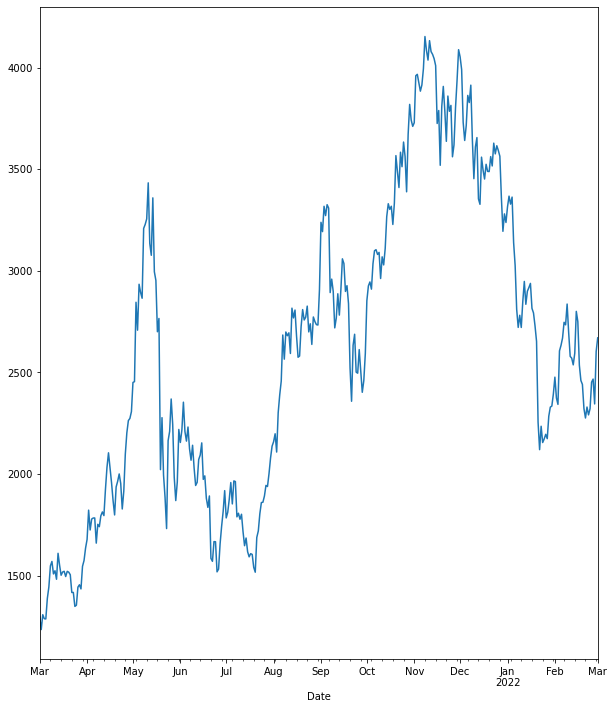

In [9]:
data.plot(figsize=(10, 12), subplots=True)

In [10]:
data.describe().round(2)

count     366.00
mean     2596.55
std       755.39
min      1235.11
25%      1954.47
50%      2594.04
75%      3204.96
max      4152.47
Name: Adj Close, dtype: float64

In [11]:
data.diff().head()

Date
2021-03-01          NaN
2021-03-02   -63.547119
2021-03-03    73.041748
2021-03-04   -19.697388
2021-03-05    -1.201050
Name: Adj Close, dtype: float64

In [12]:
data.diff().describe().round(2)

count    365.00
mean       3.76
std      129.57
min     -743.61
25%      -63.58
50%       10.00
75%       73.59
max      432.45
Name: Adj Close, dtype: float64

In [13]:
data.pct_change().round(4).head()

Date
2021-03-01       NaN
2021-03-02   -0.0489
2021-03-03    0.0591
2021-03-04   -0.0151
2021-03-05   -0.0009
Name: Adj Close, dtype: float64

In [16]:
data=pd.DataFrame(data)

<AxesSubplot:>

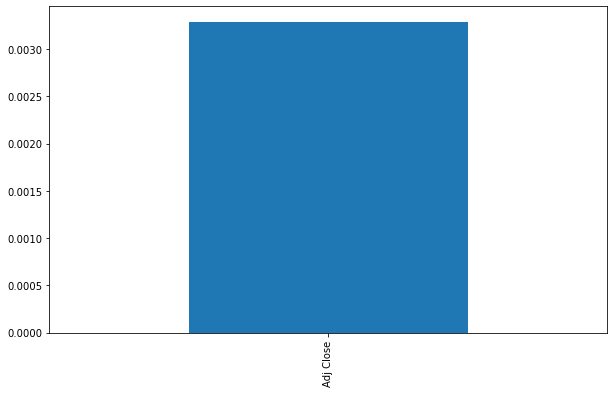

In [17]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6))

In [18]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2021-03-01,NaN
2021-03-02,-0.0502
2021-03-03,0.0575
2021-03-04,-0.0152
2021-03-05,-0.0009


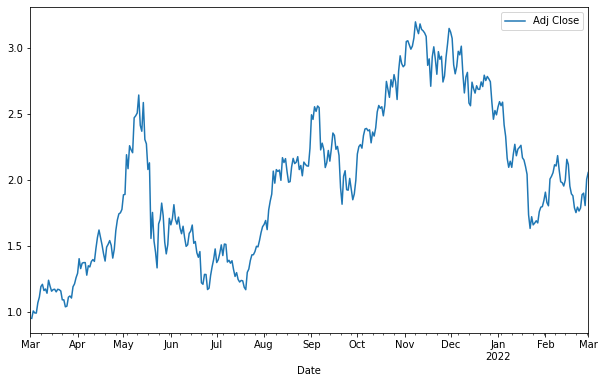

In [19]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [20]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2021-03-07,1444.836914
2021-03-14,1551.903198
2021-03-21,1504.761353
2021-03-28,1435.042847
2021-04-04,1778.742065


In [21]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2021-03-31,1635.802734
2021-04-30,2307.255615
2021-05-31,2219.446045
2021-06-30,1918.458130
2021-07-31,2137.195801


<AxesSubplot:xlabel='Date'>

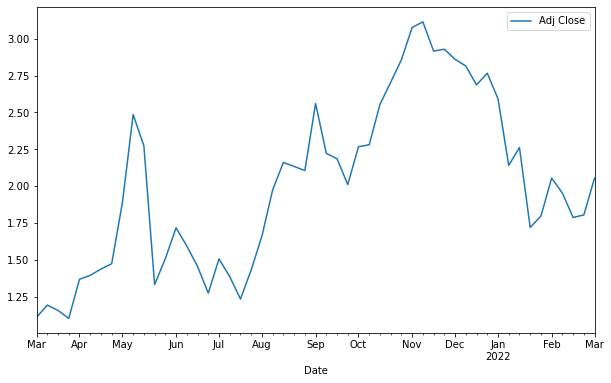

In [22]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

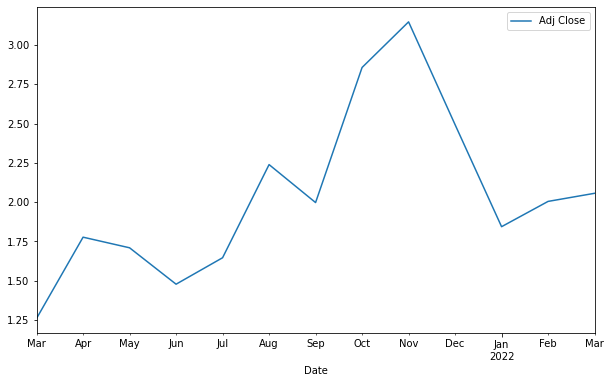

In [23]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

# Volatility

In [28]:
import numpy as np
import pandas as pd

In [32]:
df = yf.download("ETH-EUR", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [33]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,2321.921143,2503.081055,2307.797852,2452.134766,2452.134766,15264244490
2022-02-26,2452.537354,2527.877930,2434.814697,2467.274658,2467.274658,10401568683
2022-02-27,2466.735596,2511.644287,2317.335693,2345.002441,2345.002441,14445714348
2022-02-28,2344.439209,2610.910400,2316.643311,2603.092529,2603.092529,17179873150
2022-03-01,2603.604980,2716.282471,2567.195557,2670.120850,2670.120850,16849401677


In [34]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.04893311708856893,
 0.05913806544861111,
 -0.015057470170324912,
 -0.000932166528769687,
 0.07878196424476787]

In [35]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.05017088987561527,
 0.05745543153840173,
 -0.015171984862787985,
 -0.0009326012661744881,
 0.07583259379437786]

In [36]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 1.19971196 and its annulized volatility is 0.97475885


In [37]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.72079648 and its annulized volatility is 0.98242968


# Binomial Tree

Binomial Options Pricing Model (BOPM) provides a generalized numerical method for the valuation of options. This model uses a "discrete-time" model of varying price over time of the underlying financial instrument..

In [1]:
import numpy as np
import os

In [2]:
S0 = 2670.0             # spot stock price
K = 2370.0              # strike
T = 1/52                # maturity 
r = 0.015               # risk free rate 
sig = 0.98              # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [3]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [4]:
print('up factor', u)

up factor 1.0703126200131656


In [5]:
print('down factor', d)

down factor 0.9343064645801329


In [135]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [136]:
S

array([[2670.        , 2857.73469544, 3058.66950917, 3273.73257612,
        3503.91729077],
       [   0.        , 2494.59826043, 2670.        , 2857.73469544,
        3058.66950917],
       [   0.        ,    0.        , 2330.71928125, 2494.59826043,
        2670.        ],
       [   0.        ,    0.        ,    0.        , 2177.60609159,
        2330.71928125],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        2034.55144868]])

In [137]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4835490952263654

In [138]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         39.28071875],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        335.44855132]])

In [139]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 34.31970751,   5.4096927 ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,  61.39272926,  10.47550268,   0.        ,
          0.        ],
       [  0.        ,   0.        , 109.07471826,  20.28509982,
          0.        ],
       [  0.        ,   0.        ,   0.        , 192.22300111,
         39.28071875],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        335.44855132]])

In [140]:
print('European ' + payoff, str( V[0,0]))

European put 34.31970751390702


# Monte Carlo Simulation

A Monte Carlo Simulation is a model used to forecast the probality of various outcomes when there is an intervention of random variables.

In [141]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [142]:
T = 1/52
r = 0.015
sigma = 0.98
S0 = 2670.0
K = 2370.0

In [143]:
S = mcs_simulation_np(1000)

In [144]:
S = np.transpose(S)
S

array([[2670.        , 2664.16518155, 2669.78557398, ..., 2642.07006136,
        2649.52928067, 2644.65760891],
       [2670.        , 2688.86707847, 2681.97466892, ..., 3231.15395524,
        3247.03185002, 3243.98923054],
       [2670.        , 2653.1396024 , 2630.37028389, ..., 2511.44057243,
        2511.21537898, 2512.42236962],
       ...,
       [2670.        , 2671.84522712, 2685.95836309, ..., 2131.06248175,
        2125.04446645, 2121.12314046],
       [2670.        , 2667.13944022, 2669.13644404, ..., 2393.11167478,
        2384.22669128, 2378.09430426],
       [2670.        , 2678.03245805, 2657.01502371, ..., 2596.0710062 ,
        2612.77839407, 2626.28537696]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

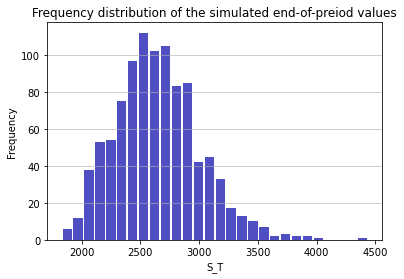

In [145]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [146]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 38.20483856090683


# Black-Scholes Model

In [147]:
import matplotlib.pyplot as plt
import scipy.stats as si
import numpy as np

In [148]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [149]:
euro_option_bsm(2670.0, 2370.0, 1/52, 0.015, 0, 0.98, 'put')

35.61092835755221

In [150]:
S = np.linspace(2200,3000,51)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
        Put [i] = euro_option_bsm(S[i], 2670.0, 1/52, 0.015, 0, 0.98, 'put')

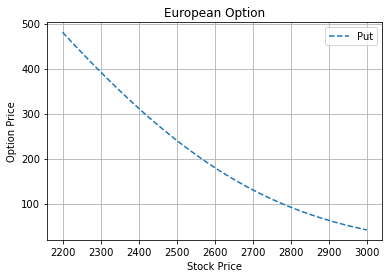

In [151]:
fig = plt.figure()
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Put'])

# Greeks

In [152]:
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

# Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [153]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [154]:
delta(2670.0, 2370.0, 1/52, 0.015, 0, 0.98, 'put')

-0.1717953407977575

In [155]:
S = np.linspace(2200,3000,51)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
        Delta_Put [i] = delta(S[i], 2670.0, 1/52, 0.015, 0, 0.98, 'put')

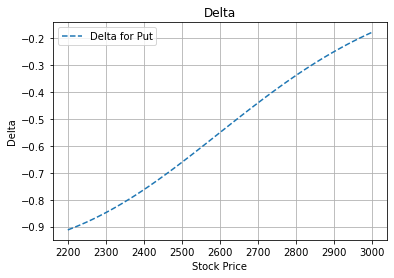

In [156]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [157]:
S = np.linspace(2200, 3000, 51)
T = np.linspace(1, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 2370, 1/52, 0.015, 0, 0.98, 'put')

C:\Users\Admin\AppData\Local\Temp/ipykernel_15560/3857024986.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


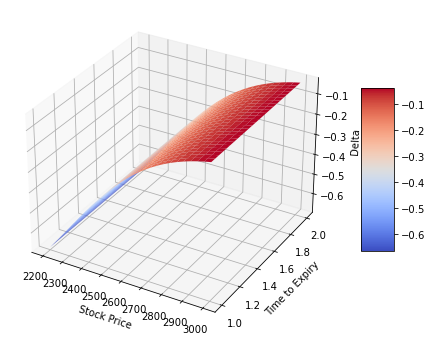

In [158]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [159]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [160]:
gamma(2670.0, 2370.0, 1/52, 0.015, 0, 0.98, 'put')

0.0007020951564263146

In [161]:
S = np.linspace(2200,3000,51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 2670, 1/52, 0.015, 0, 0.98, 'put')

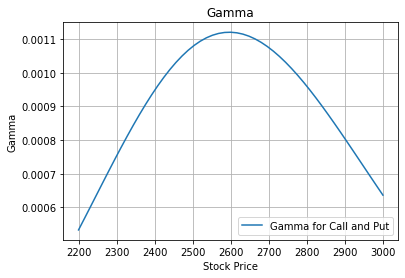

In [162]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [163]:
S = np.linspace(2200, 3000, 51)
T = np.linspace(1, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 2370, 1/52, 0.015, 0, 0.98, 'put')

C:\Users\Admin\AppData\Local\Temp/ipykernel_15560/3848859912.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


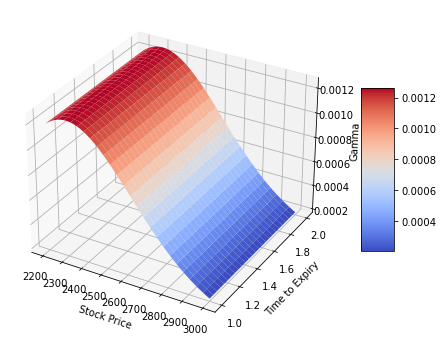

In [164]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [165]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [166]:
theta(2670.0, 2370.0, 1/52, 0.015, 0, 0.98, 'put')

2410.895357667269

In [167]:
T = np.linspace(2200, 3000, 51)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
        Theta_Put [i] = theta(2670.0, 2370.0, T[i], 0.015, 0, 0.98, 'put')

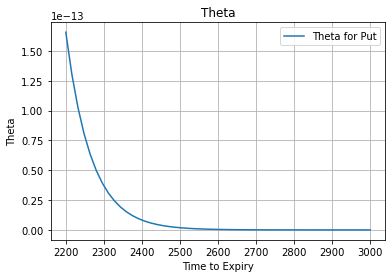

In [168]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [169]:
S = np.linspace(2200, 3000, 51)
T = np.linspace(1, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 2370, 1/52, 0.015, 0, 0.98, 'put')

C:\Users\Admin\AppData\Local\Temp/ipykernel_15560/383283098.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


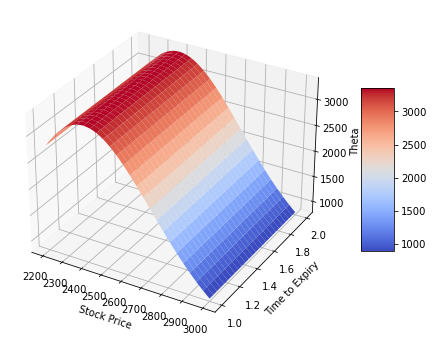

In [170]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [171]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [172]:
rho(2670.0, 2370.0, 1/52, 0.015, 0, 0.98, 'put')

-9.505855543991629

In [173]:
r = np.linspace(2200,3000,51)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
        Rho_Put [i] = rho(2670.0, 2370.0, 1/52, r[i], 0, 0.98, 'put')

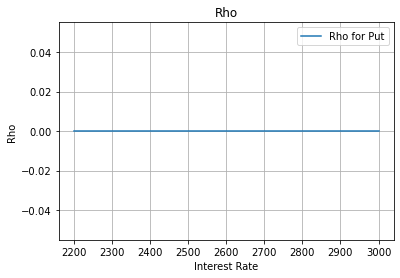

In [174]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [175]:
S = np.linspace(2200, 3000, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 2370, 1/52, 0.015, 0, 0.98, 'put')

C:\Users\Admin\AppData\Local\Temp/ipykernel_15560/2235945349.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


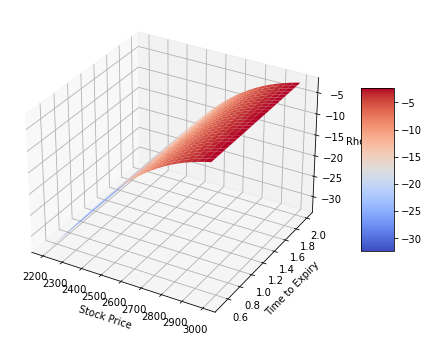

In [176]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [177]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [178]:
vega(2670.0, 2370.0, 1/52, 0.015, 0, 0.98, 'put')

94.328131489127

In [179]:
vol = np.linspace(2200,3000,51)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(2670.0, 2370.0, 1/52, 0.015, 0, vol[i], 'put')

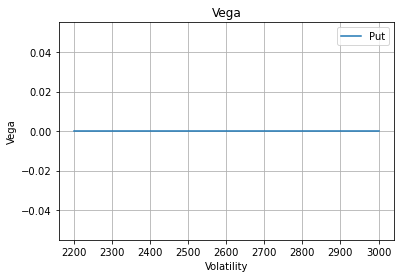

In [180]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Put'])

In [181]:
S = np.linspace(2200, 3000, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 2370, T[i], 0.015, 0, 0.98, 'put')

C:\Users\Admin\AppData\Local\Temp/ipykernel_15560/2704700163.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


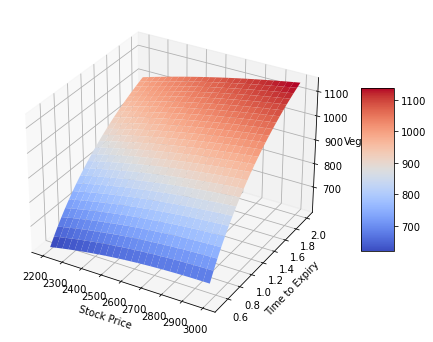

In [182]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed


Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [183]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [184]:
speed(2670.0, 2370.0, 1/52, 0.015, 0, 0.98, 'put')

-2.9059321435837543e-07

In [185]:
S = np.linspace(2200,3000,51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 2670.0, 1, 0.015, 0, 0.98, 'put')

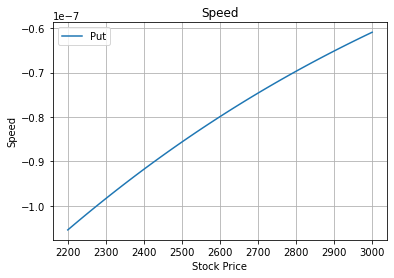

In [186]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Put'])

In [187]:
S = np.linspace(2200, 3000, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 2370, 1/52, 0.015, 0, 0.98, 'put')

C:\Users\Admin\AppData\Local\Temp/ipykernel_15560/1603304871.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


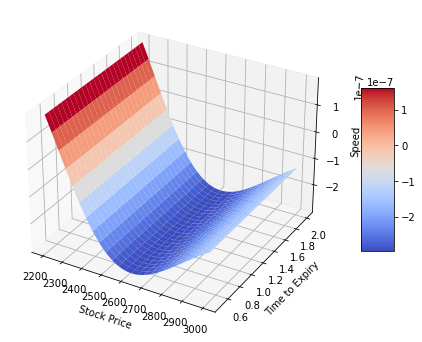

In [188]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);